# 휴먼지능정보공학과 201810757 김민석

## 문제 1
2022년 6월 20일이라는 것을 알 수 있는 화면을 2개 캡쳐한 이미지A, 이미지B를 NFT로 제작하세요.

(시간이 부족하면 수업시간에 사용했던 이미지를 사용하세요).

컨트랙 명칭은 MyNFT로 하세요.



문제를 풀기 위해서는, NFT와 관련한 정보를 저장합니다.

	- mapping(uint256 => Item) public tokenIdToItem 으로 선언하고 저장.

    - tokenId에 대해 (1) 원소유자주소(즉 owner), (2) 현소유자주소, (3) 가격 (없으면 0), (4) tokenURI, (5) 현시각을 저장.



그리고 다음 함수를 구현하세요.

- function mintWithURI(address to, string memory tokenURI) public returns(uint256)

	- 소유자주소, tokenURI를 입력하고 mint하는 함수

	- 내부함수 _mint()를 호출해서 처리

- function mintWithIdURI(uint256 _id, address to, string memory tokenURI) public returns(uint256)

	- tokenId, 소유자주소, tokenURI를 입력하고 mint하는 함수

	- id가 이미 존재하는지 코딩하지 않아도 됨. 중복이면 자동으로 실패하는 로직을 내부적으로 이미 가지고 있다.

- function myTransfer(address from, address to, uint256 _tokenId) public

    - from에서 to로 _tokenId를 이전하는 함수

    - transferFrom 또는 내부함수 _transfer를 호출해서 처리

- function setTokenIdToItem(uint256 _id, address _o, address _to, uint256 _p,

    string memory _uri, uint256 _t) public

    - tokenIdToItem 항목에 저장하는 함수

- getTokenIdToItem(uint256 tokenId) public view returns (address, address,

    uint256, string memory, uint256)

	- tokenIdToItem 항목을 출력

- getItemsLength() 함수: Item 개수 출력

- getOwner() 함수: 컨트랙의 소유주 출력

- getTokenURI(uint256 tokenId) 함수: tokenId의 tokenURI 출력

- getTotalSupply() 함수: 현재 tokenId가 총잔고이다.

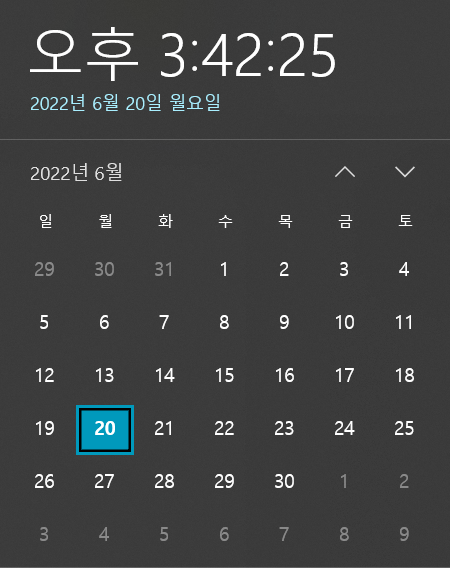

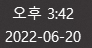

In [1]:
%%writefile src/MyNFT.sol
// SPDX-License-Identifier: MIT
pragma solidity ^0.8.0;

import "@openzeppelin/contracts/token/ERC721/extensions/ERC721URIStorage.sol";
//import "https://github.com/OpenZeppelin/openzeppelin-contracts/blob/v4.4.0/contracts/token/ERC721/extensions/ERC721URIStorage.sol";
import "@openzeppelin/contracts/utils/Counters.sol";
//import "https://github.com/OpenZeppelin/openzeppelin-contracts/blob/v4.4.0/contracts/utils/Counters.sol";
import "@openzeppelin/contracts/access/Ownable.sol";
//import "https://github.com/nibbstack/erc721/blob/2.6.1/src/contracts/ownership/ownable.sol";

contract MyNFT is ERC721URIStorage, Ownable {
    using Counters for Counters.Counter;
    Counters.Counter private _tokenIds; //NFT id
    
    mapping(uint256 => Item) public tokenIdToItem
    
    constructor() ERC721("Hello DApp Screens", "KMS") {}
    // override
    // does not save toeknURI in the state var
    
    function _baseURI() internal pure override returns (string memory) {
        return "https://ipfs.io/ipfs/QmZssZt2tURKbHjnUyUKYrzpBFYvgxHURDb1acZfFdcJLz, QmezNDCZJWtb1gHCLVqbmJoBmQv1r5aB5LuMNLL47afK8J";
    }
    
    function mintWithURI(address to, string memory tokenURI) public returns(uint256) {
        _tokenIds.increment(); // add 1 by minting
        uint256 newTokenId = _tokenIds.current();
        _mint(to, newTokenId); // or _safeMint(to, newTokenId);
        _setTokenURI(newTokenId, tokenURI); // need to import ERC721URIStorage

        return newTokenId;
    }
    
    function mintWithIdURI(uint256 _id, address to, string memory tokenURI) public returns(uint256) {
        
    }
    
    function myTransfer(address from, address to, uint256 _tokenId) public {
         require(_exists(_tokenId), "Error: TokenId not owned");
        require(msg.value >= tranPrice[_tokenId], "Error: Token costs more");
        _transfer(from, to, _tokenId);
        emit Transfer(from, to, _tokenId, tokenURI(_tokenId), tranPrice[_tokenId]);
    }
    
    function setTokenIdToItem(uint256 _id, address _o, address _to, uint256 _p, string memory _uri, uint256 _t) public {
        
    }
    
    function getTokenIdToItem(uint256 tokenId) public view returns (address, address, uint256, string memory, uint256) {
        
    }
    
    function getItemsLength() {
        
    }
    
    function getOwner() view public returns(address) {
        return owner();  //function of the Ownerable contract
    }
    
    function getTokenURI(uint256 tokenId) public view virtual override returns (string memory) {
        require(_exists(tokenId), "ERC721Metadata: URI query for nonexistent token");
        string memory baseURI = _baseURI();
        return bytes(baseURI).length > 0 ? string(abi.encodePacked(baseURI, tokenId.toString())) : "";    
    }
    
    function getTotalSupply(){
        _tokenIds.current();
    }
}

Overwriting src/MyNFT.sol


### (1) no solution

## 문제 2
[문제] 다음을 프로그램하고 출력하세요.



---> 여기부터 REMIX에서 실행하세요.

주소0은 account[0], 주소1은 accounts[1], 주소2는 accounts[2]...으로 함.

* (1) REMIX에서 mintWithURI(주소1, 이미지A의 URI) 함수의 성공로그 붙여 넣으세요.

* (2) REMIX에서 mintWithURI(주소2, 이미지B의 URI) 함수의 성공로그 붙여 넣으세요.

* (3) REMIX에서 mintWithIdURI(tokenId=1, 주소1, 이미지A의 URI) 함수의 실패로그 붙여 넣으세요. 

* (4) REMIX에서 ownerOf(tokenId=1) 함수의 성공로그 붙여 넣으세요.

* (5) REMIX에서 transferFrom(tokenId=1, 주소1, 주소2) 함수의 성공로그 붙여 넣으세요.



---> 여기부터 로컬에서 실행하세요.

* (6) 로컬에서 컴파일하세요.



---> 여기부터 노드 스크립트 실행 (ganache 백그라운드 실행)



---> 테스트 실행하면서 소유이전을 반복하면 오류가 발생할 수 있으니 주의하세요.

---> 배포주소를 새롭게 받아서 하면 쉽게 오류가 사라집니다. 처음부터 시작하게 되니까 당연히 오류가 사라집니다.

* (7) ganache에서 배포하고, 컨트랙 배포주소 출력하세요.

* (8) 주소0에서 주소1에게 발행하세요. mintWithURI(주소1, 이미지A의 URI)



출력예시 --> (8) minting from 0xE4F45... to 0x421A4...



* (9) 주소0에서 주소2에게 발행하세요. mintWithURI(주소1, 이미지B의 URI)



출력예시 --> (9) minting from 0xE4F45... to 0x1BFBE...



* (10) Item 개수를 출력. 현재 mint된 token개수, 2가 출력되어야 함.



출력예시 --> (10) Total number minted: 2

* (11) 주소0, 주소1, 주소2의 잔고개수 출력.



출력예시 --> 

(11) balanceOf 0xE4F45...: 0

(11) balanceOf 0x421A4...: 1

(11) balanceOf 0x1BFBE...: 1



* (12) tokenId 1의 소유권자 및 TokenURI 출력.



출력예시 -->

(12) ownerOf tokenId 1: 0x421A4...

(12) tokenURI of tokenId 1: https://ipfs.io/ipfs/QmbdwcmzYacLZHLBAhAsaJm2aPV1bzBjFjweD1UgZzkEtA



* (13) getTokenIdToItem(tokenId=1)을 출력.



* (14) owner가 tokenId 1를 주소1에서 주소2로 이전. tokenIdToItem도 당연히 수정되어야 한다.

그리고 변경된 tokenId 1의 소유주를 출력 (tokenIdToItem에서 읽어옴)



출력예시 --> (14) ownerOf tokenId=1 after transferred: 0x1BFBE...

* (15) 주소2가 자신의 토큰(tokenId=2)을 주소3으로 소유권이전.

그리고 변경된 tokenId 2의 소유주를 출력.



출력예시 --> (15) ownerOf tokenId=2 after transferred: 0xC6b48...

* (16) tokenId 2를 제거하세요 (burn). 제거되었는지 잔고를 출력.



출력예시 --> (16) balanceOf 0xC6b48...: 0



* (17) 소유권이전 시 자동으로 Transfer(from, to, tokenId) 이벤트 발생됩니다.

tokenId 1번에 대해 발생한 이벤트를 출력하세요.

주피터 노트북에서 하기 보다는 명령창에서 실행하고 그 출력을 복사해서 붙여넣기하는 편이 좋아요.



출력예시 ---> 

Event fired: {"0":"0xC6b4880724ab48D8e3Cc52Cc72C57aaaBE7a4301",

"1":"0x0000000000000000000000000000000000000000",

"2":"1",

"from":"0xC6b4880724ab48D8e3Cc52Cc72C57aaaBE7a4301",

"to":"0x0000000000000000000000000000000000000000",

"tokenId":"1"}



* (18) 현재 테스트넷의 블록넘버를 구하세요.

* (19) 테스트넷에 배포하고 주소를 구하세요. REMIX 또는 스크립트를 작성해서 실행해도 된다.



### (2) no solution